<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Data_205_Project_Part_I_detention_json.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [188]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [189]:
# tab-separated data into pandas data frame.
df = pd.read_json('https://data.montgomerycountymd.gov/resource/gknn-vrfa.json')

In [190]:
df.head()

,month_year,detention_services,detention_services_and_community_corrections_names,category,average_daily_population
0,2021-03-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946
1,2021-03-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505
2,2021-03-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
3,2021-03-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301
4,2021-03-01T00:00:00.000,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67


In [191]:
# check dataframe type
type(df)

pandas.core.frame.DataFrame

In [192]:
# change column names
df_1 = df.rename(columns = {"month_year": "Date", "detention_services":"DSCC Abbr.", "detention_services_and_community_corrections_names":"DSCC Names", "average_daily_population" : "Avg. Daily Pop."})
df_1.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-03-01T00:00:00.000,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946
1,2021-03-01T00:00:00.000,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505
2,2021-03-01T00:00:00.000,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
3,2021-03-01T00:00:00.000,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301
4,2021-03-01T00:00:00.000,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67


In [193]:
# Stripping time but this strip does not remain in further code
df_1['Date'].str.rstrip('T00:00:00.000')

0      2021-03-01
1      2021-03-01
2      2021-03-01
3      2021-03-01
4      2021-03-01
          ...    
445    2015-01-01
446    2015-01-01
447    2015-01-01
448    2015-01-01
449    2015-01-01
Name: Date, Length: 450, dtype: object

In [194]:
# Checking data types for each column
print(df_1.dtypes)

Date               object
DSCC Abbr.         object
DSCC Names         object
category           object
Avg. Daily Pop.     int64
dtype: object


In [195]:
#Checking Shape
print(df_1.shape)

(450, 5)


In [196]:
# Describe
df_1.describe()

,Avg. Daily Pop.
count,450.000000
mean,373.493333
std,292.028061
min,0.000000
25%,107.000000
50%,235.500000
75%,626.750000
max,1025.000000


In [197]:
# Check null 
df_1.isnull()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
445,False,False,False,False,False
446,False,False,False,False,False
447,False,False,False,False,False
448,False,False,False,False,False


In [198]:
# Null sum
df_1.isnull().sum()

Date               0
DSCC Abbr.         0
DSCC Names         0
category           0
Avg. Daily Pop.    0
dtype: int64

In [199]:
# Basic Plots with Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')

In [200]:
# Changing Date to datetime
df_1.Date = pd.to_datetime(df_1.Date)

In [201]:
# group by Month/Year
df_1_time = df_1.groupby('Date')
df_1_time.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505
2,2021-03-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67
...,...,...,...,...,...
444,2015-01-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,162
445,2015-01-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,718
446,2015-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,77
447,2015-01-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505


In [202]:
# Arrange by DSCC Abbreviation - did not work
df_1_abbr = df_1.groupby('DSCC Abbr.')
df_1_abbr.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505
2,2021-03-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67
5,2021-03-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,51
6,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50
7,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918
8,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485
9,2021-02-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68


In [203]:
# Arrange by DSCC Abbreviation then by sort by Date
df_1_abbr2 = df_1.groupby('DSCC Abbr.').apply(lambda x: x.sort_values('Date'))
df_1_abbr2.head(30)

Date  ... Avg. Daily Pop.
DSCC Abbr.                 ...                
ACS        448 2015-01-01  ...             721
           443 2015-02-01  ...             738
           437 2015-03-01  ...             749
           431 2015-04-01  ...             780
           423 2015-05-01  ...             751
           416 2015-06-01  ...             699
           411 2015-07-01  ...             705
           405 2015-08-01  ...             739
           401 2015-09-01  ...             703
           392 2015-10-01  ...             758
           385 2015-11-01  ...             879
           382 2015-12-01  ...             882
           377 2016-01-01  ...             814
           367 2016-02-01  ...             838
           361 2016-03-01  ...             885
           355 2016-04-01  ...             962
           350 2016-05-01  ...            1025
           346 2016-06-01  ...             945
           336 2016-07-01  ...             933
           332 2016-08-01  ...             948
           326 2016-09-01  ...             955
           320 2016-10-01  ...             894
           317 2016-11-01  ...             804
           310 2016-12-01  ...             729
           301 2017-01-01  ...             700
           294 2017-02-01  ...             731
           291 2017-03-01  ...             703
           286 2017-04-01  ...             649
           281 2017-05-01  ...             644
           272 2017-06-01  ...             645

[30 rows x 5 columns]

In [204]:
df_1_abbr2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 450 entries, ('ACS', 448) to ('PTSU', 0)
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             450 non-null    datetime64[ns]
 1   DSCC Abbr.       450 non-null    object        
 2   DSCC Names       450 non-null    object        
 3   category         450 non-null    object        
 4   Avg. Daily Pop.  450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 42.5+ KB


In [205]:
# make datetime - can also do it at dataframe level, put datetime in dictionary 
df_1_abbr2.Date = pd.to_datetime(df_1_abbr2.Date)
df_1_abbr2.head(1)

,,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.
DSCC Abbr.,,,,,,
ACS,448,2015-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721


In [206]:
# index changing code


In [207]:
df_1_abbr2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 450 entries, ('ACS', 448) to ('PTSU', 0)
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             450 non-null    datetime64[ns]
 1   DSCC Abbr.       450 non-null    object        
 2   DSCC Names       450 non-null    object        
 3   category         450 non-null    object        
 4   Avg. Daily Pop.  450 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 42.5+ KB


In [208]:
# Simplify name
df_2 = df_1_abbr2

In [209]:
# Create separate columns for month day and year 
df_2.Date = pd.to_datetime(df_2.Date)

In [210]:
df_2[['month', 'year']] = df_2.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_2

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        448 2015-01-01        ACS  ...    01   2015
           443 2015-02-01        ACS  ...    02   2015
           437 2015-03-01        ACS  ...    03   2015
           431 2015-04-01        ACS  ...    04   2015
           423 2015-05-01        ACS  ...    05   2015
...                   ...        ...  ...   ...    ...
PTSU       28  2020-11-01       PTSU  ...    11   2020
           20  2020-12-01       PTSU  ...    12   2020
           12  2021-01-01       PTSU  ...    01   2021
           7   2021-02-01       PTSU  ...    02   2021
           0   2021-03-01       PTSU  ...    03   2021

[450 rows x 7 columns]

In [211]:
# month and year separate columns created
df_2.groupby(df_2['year'])
df_2.head(10)

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        448 2015-01-01        ACS  ...    01   2015
           443 2015-02-01        ACS  ...    02   2015
           437 2015-03-01        ACS  ...    03   2015
           431 2015-04-01        ACS  ...    04   2015
           423 2015-05-01        ACS  ...    05   2015
           416 2015-06-01        ACS  ...    06   2015
           411 2015-07-01        ACS  ...    07   2015
           405 2015-08-01        ACS  ...    08   2015
           401 2015-09-01        ACS  ...    09   2015
           392 2015-10-01        ACS  ...    10   2015

[10 rows x 7 columns]

In [212]:
# Remove DSCC Name Column
df_2.drop(df_2.columns[[2]], axis=1, inplace=True,)
df_2.head(5)

Date DSCC Abbr.  ... month   year
DSCC Abbr.                            ...             
ACS        448 2015-01-01        ACS  ...    01   2015
           443 2015-02-01        ACS  ...    02   2015
           437 2015-03-01        ACS  ...    03   2015
           431 2015-04-01        ACS  ...    04   2015
           423 2015-05-01        ACS  ...    05   2015

[5 rows x 6 columns]

In [213]:
# Create separate columns for month day and year 
df_1.Date = pd.to_datetime(df_1.Date)

In [214]:
df_1[['month', 'year']] = df_1.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_1

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
2,2021-03-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,03,2021
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021
...,...,...,...,...,...,...,...
445,2015-01-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,718,01,2015
446,2015-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,77,01,2015
447,2015-01-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,01,2015
448,2015-01-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,721,01,2015


In [215]:
# drop date column
df_1a = df_1.drop(df_1.columns[0:1], axis=1)

In [216]:
df_1a.head(5)

,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
2,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,03,2021
3,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021


In [217]:
# Trying to remove index column
df_1a.reset_index(drop=True, inplace=True)
df_1a.head(5)

,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
2,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,03,2021
3,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021


In [218]:
# Group by Year Sum
df_year = df_1a.groupby(['year'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_year.head()

,year,Avg. Daily Pop.
0,2015,27811
1,2016,30138
2,2017,27102
3,2018,27464
4,2019,25649


In [219]:
# Checking data types for each column
print(df_1.dtypes)

Date               datetime64[ns]
DSCC Abbr.                 object
DSCC Names                 object
category                   object
Avg. Daily Pop.             int64
month                      object
year                       object
dtype: object


Text(0, 0.5, 'Avg. Daily Pop.')

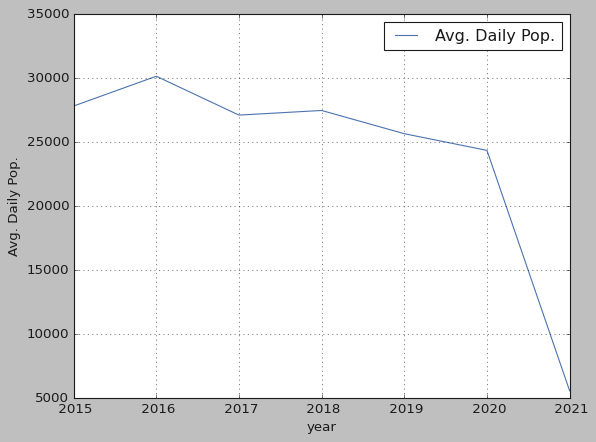

In [220]:
# matplotlib plot
import matplotlib.pyplot as plt
df_year.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

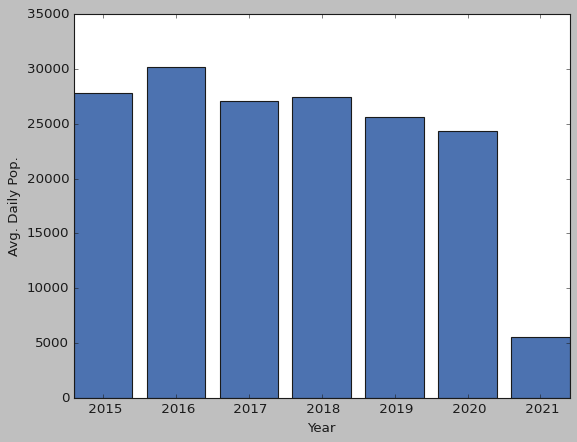

In [221]:
# matplotlib barplot
import matplotlib.pyplot as plt
x = df_year['year']
y = df_year['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('Year')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [222]:
# Sum of avg. daily pop by month and year
df_monthyear = df_1a.groupby(['year', 'month'], as_index=False).agg({'Avg. Daily Pop.': sum})
df_monthyear.head(20)

,year,month,Avg. Daily Pop.
0,2015,01,2284
1,2015,02,2277
2,2015,03,2273
3,2015,04,2343
4,2015,05,2310
5,2015,06,2228
6,2015,07,2215
7,2015,08,2311
8,2015,09,2320
9,2015,10,2347


Text(0, 0.5, 'Avg. Daily Pop.')

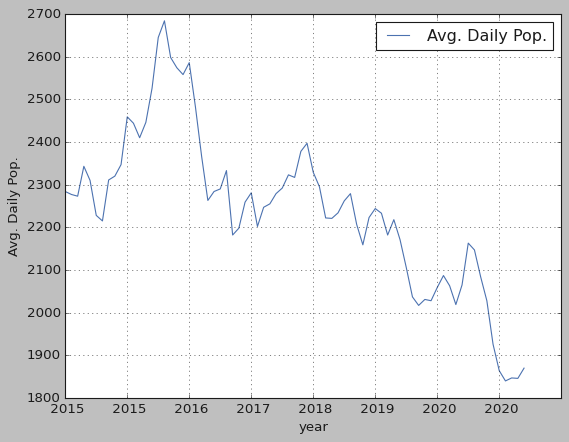

In [223]:
# matplotlib plot
df_monthyear.plot(x = 'year', grid=True)
plt.xlabel('year')
plt.ylabel('Avg. Daily Pop.')

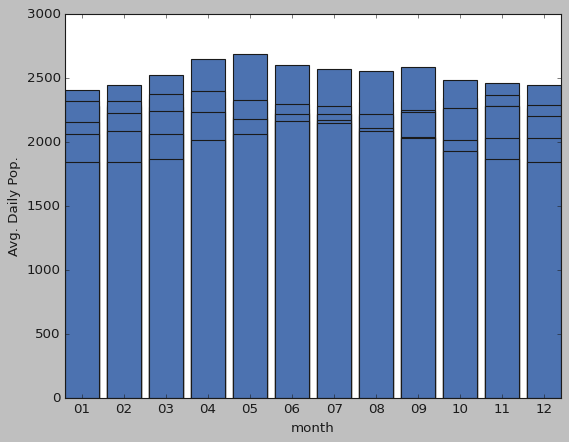

In [224]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [225]:
# trying to isolate entries by year
# df_monthyear.groupby('year').get_group(2015)

In [226]:
df_monthyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             75 non-null     object
 1   month            75 non-null     object
 2   Avg. Daily Pop.  75 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


In [227]:
# turning "year" column into integer instead of object
df_monthyear['year'].astype(int)

0     2015
1     2015
2     2015
3     2015
4     2015
      ... 
70    2020
71    2020
72    2021
73    2021
74    2021
Name: year, Length: 75, dtype: int64

In [228]:
# turning "month" column into integer instead of object
df_monthyear['month'].astype(int)

0      1
1      2
2      3
3      4
4      5
      ..
70    11
71    12
72     1
73     2
74     3
Name: month, Length: 75, dtype: int64

In [229]:
# trying to get rid of the lines and select only months for 2015
df_2015 = df_monthyear
df_2015['year'] != 2016
df_2015.iloc[10:20]

,year,month,Avg. Daily Pop.
10,2015,11,2459
11,2015,12,2444
12,2016,01,2410
13,2016,02,2446
14,2016,03,2526
15,2016,04,2645
16,2016,05,2684
17,2016,06,2598
18,2016,07,2574
19,2016,08,2558


In [230]:
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 0 to 74
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             75 non-null     object
 1   month            75 non-null     object
 2   Avg. Daily Pop.  75 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ KB


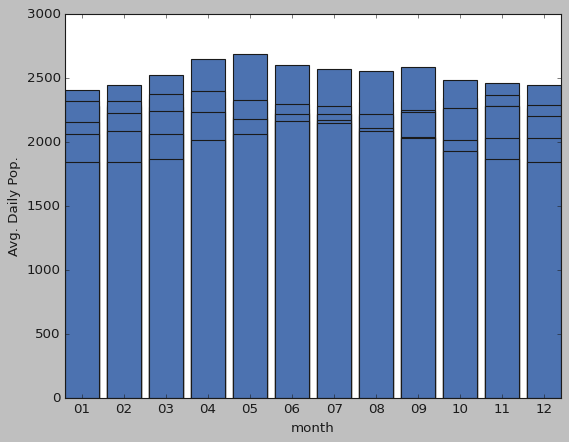

In [231]:
# Trying to Plot only 2015
x = df_2015['month']
y = df_2015['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()

In [232]:
# example code:  df[(df['age'] > 28) & (df['grade'] == 'A')]
df_monthyear[(df_monthyear['year'] == '2016')]

,year,month,Avg. Daily Pop.


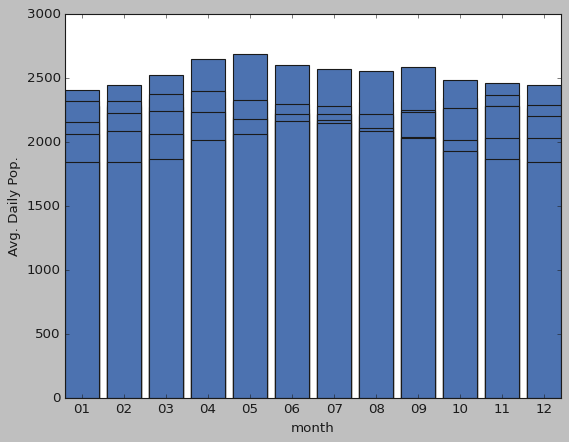

In [233]:
x = df_monthyear['month']
y = df_monthyear['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('month')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# in plot below the separate lines in each bar are for each year. Will try to add color coded stacking.

In [234]:
df_dscc = df_1.groupby('DSCC Names').apply(lambda x: x.sort_values('year'))
df_dscc.head(20)

Date DSCC Abbr.  ... month   year
DSCC Names                                                ...             
Alternative Community Services 448 2015-01-01        ACS  ...    01   2015
                               382 2015-12-01        ACS  ...    12   2015
                               385 2015-11-01        ACS  ...    11   2015
                               392 2015-10-01        ACS  ...    10   2015
                               401 2015-09-01        ACS  ...    09   2015
                               405 2015-08-01        ACS  ...    08   2015
                               443 2015-02-01        ACS  ...    02   2015
                               416 2015-06-01        ACS  ...    06   2015
                               423 2015-05-01        ACS  ...    05   2015
                               431 2015-04-01        ACS  ...    04   2015
                               437 2015-03-01        ACS  ...    03   2015
                               411 2015-07-01        ACS  ...    07   2015
                               310 2016-12-01        ACS  ...    12   2016
                               320 2016-10-01        ACS  ...    10   2016
                               326 2016-09-01        ACS  ...    09   2016
                               336 2016-07-01        ACS  ...    07   2016
                               317 2016-11-01        ACS  ...    11   2016
                               350 2016-05-01        ACS  ...    05   2016
                               346 2016-06-01        ACS  ...    06   2016
                               377 2016-01-01        ACS  ...    01   2016

[20 rows x 7 columns]

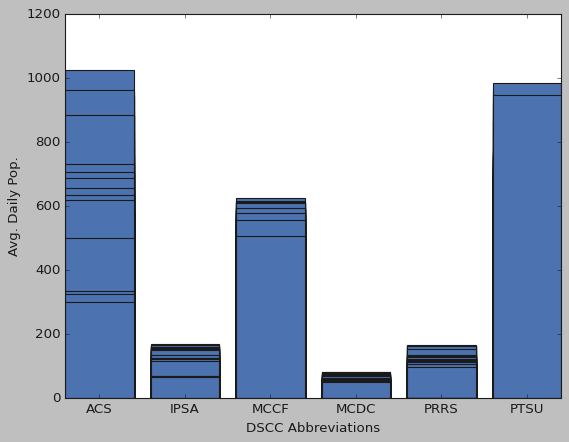

In [235]:
x = df_dscc['DSCC Abbr.']
y = df_dscc['Avg. Daily Pop.']
plt.bar(x, y)
plt.xlabel('DSCC Abbreviations')
plt.ylabel('Avg. Daily Pop.')
plt.show()
# not sure what lines represent, could be month/year. 

In [236]:
df_2020 = [(df_monthyear['year'] == 2020)]
df_2020[:]

[0     False
 1     False
 2     False
 3     False
 4     False
       ...  
 70    False
 71    False
 72    False
 73    False
 74    False
 Name: year, Length: 75, dtype: bool]

In [237]:
df_1.head()

,Date,DSCC Abbr.,DSCC Names,category,Avg. Daily Pop.,month,year
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
2,2021-03-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,03,2021
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021


In [238]:
# Rename columns
df_1 = df_1.rename(columns = {"DSCC Abbr.": "DSCC_Abbr.", "DSCC Names" : "DSCC_Names", "Avg. Daily Pop.": "ADP"})
df_1.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
2,2021-03-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,03,2021
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021


In [239]:
# examine unique categories to try to isolate pre-trial from sentenced
df_1.category.unique()

array(['Criminal Justice Clients under Pre-Trial Services',
       'Inmates in DOCR Custody'], dtype=object)

In [240]:
# examine uinque DSCC names to try to isolate pre-trial from sentenced
df_1.DSCC_Names.unique()

array(['Pre-Trial Supervision Unit',
       'Montgomery County Correctional Facility',
       'Pre-Release and Re-Entry Services',
       'Alternative Community Services',
       'Intervention Program for Substance Abusers',
       'Montgomery County Detention Center'], dtype=object)

In [241]:
# Drop all row entries with "Pre-Release and Re-Entry Services" since that is post-conviction
df_1_pretrial = df_1[df_1.DSCC_Names != 'Pre-Release and Re-Entry Services']
df_1_pretrial.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021
5,2021-03-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,51,03,2021


In [242]:
df_1_inmates = df_1_pretrial[df_1_pretrial.category != 'Criminal Justice Clients under Pre-Trial Services']
df_1_inmates.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
5,2021-03-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,51,03,2021
6,2021-02-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,50,02,2021
8,2021-02-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,485,02,2021
13,2021-01-01,MCDC,Montgomery County Detention Center,Inmates in DOCR Custody,53,01,2021


In [243]:
df_1_inmates.count()

Date          150
DSCC_Abbr.    150
DSCC_Names    150
category      150
ADP           150
month         150
year          150
dtype: int64

In [244]:
df_1_pts = df_1[df_1.category == 'Criminal Justice Clients under Pre-Trial Services']
df_1_pts.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021
7,2021-02-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,918,02,2021
9,2021-02-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,68,02,2021


In [245]:
df_1_pts.value_counts()

Date        DSCC_Abbr.  DSCC_Names                                  category                                           ADP  month  year 
2021-03-01  PTSU        Pre-Trial Supervision Unit                  Criminal Justice Clients under Pre-Trial Services  946  03      2021    1
2018-02-01  ACS         Alternative Community Services              Criminal Justice Clients under Pre-Trial Services  653  02      2018    1
2017-04-01  ACS         Alternative Community Services              Criminal Justice Clients under Pre-Trial Services  649  04      2017    1
2017-03-01  PTSU        Pre-Trial Supervision Unit                  Criminal Justice Clients under Pre-Trial Services  721  03      2017    1
            IPSA        Intervention Program for Substance Abusers  Criminal Justice Clients under Pre-Trial Services  151  03      2017    1
                                                                                                                                           ..
2019-01-01 

In [246]:
df_1_pretrial.groupby("category")["ADP"].mean()

category
Criminal Justice Clients under Pre-Trial Services    507.080000
Inmates in DOCR Custody                              307.953333
Name: ADP, dtype: float64

In [247]:
df_1.groupby("category")["ADP"].mean()

category
Criminal Justice Clients under Pre-Trial Services    507.080000
Inmates in DOCR Custody                              239.906667
Name: ADP, dtype: float64

In [248]:
df_1.groupby("category")["ADP"].sum()

category
Criminal Justice Clients under Pre-Trial Services    114093
Inmates in DOCR Custody                               53979
Name: ADP, dtype: int64

In [249]:
df_1_pretrial.groupby("category")["ADP"].sum()

category
Criminal Justice Clients under Pre-Trial Services    114093
Inmates in DOCR Custody                               46193
Name: ADP, dtype: int64

Text(0.5, 1.0, 'ADP by Year')

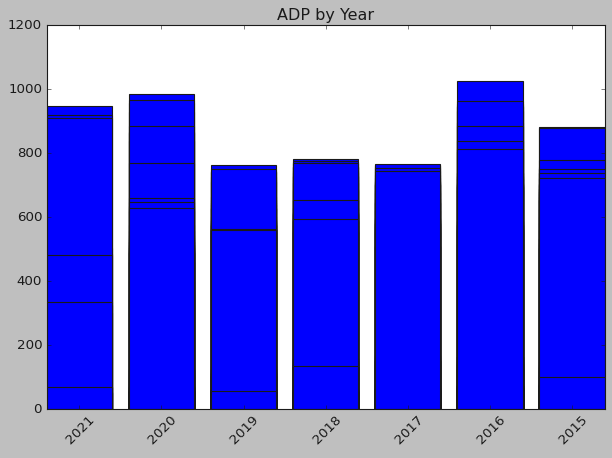

In [250]:
#PLOT 1 Average Daily Population 
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6)) 
plt.bar(x=df_1_pretrial['year'], 
        height=df_1_pretrial['ADP'], 
        color='blue') 
plt.xticks(rotation=45)
plt.title('ADP by Year')

Text(0, 0.5, 'Average Daily Population')

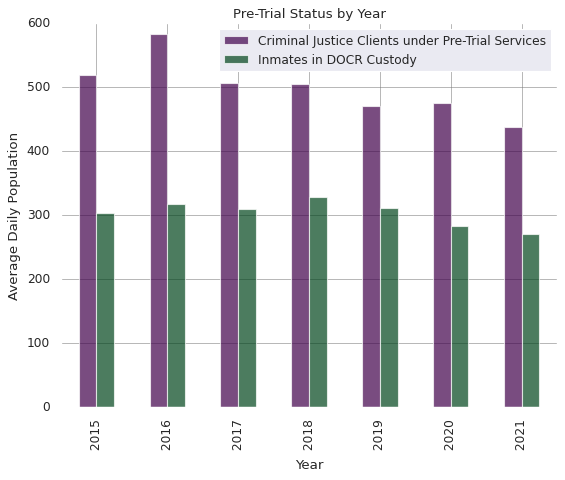

In [251]:
# Plot Comparing Pretrial services versus detention
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

ax = df_1_pretrial.groupby(['year', 'category'])['ADP'].mean().unstack().plot.bar(colormap='PRGn', alpha = 0.7)
ax.set_facecolor('white')
plt.grid(True, linewidth=0.5, color='grey', linestyle='-')
ax.legend(bbox_to_anchor = [1, 1])
plt.title("Pre-Trial Status by Year")
plt.xlabel("Year")
plt.ylabel("Average Daily Population")


Text(0, 0.5, 'Average Daily Population')

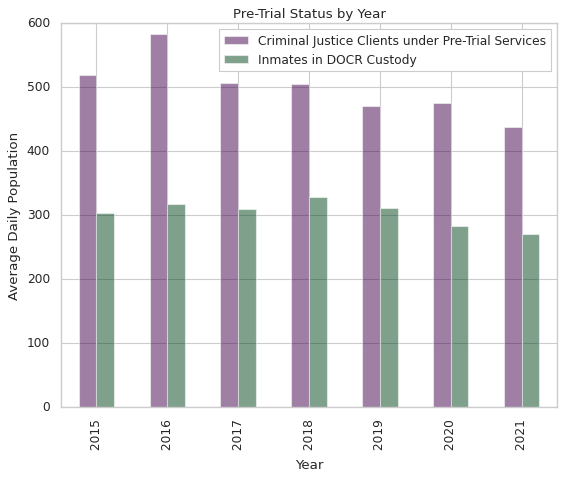

In [252]:
sns.set_style("whitegrid")

ax = df_1_pretrial.groupby(['year', 'category'])['ADP'].mean().unstack().plot.bar(colormap='PRGn', alpha = 0.5)
ax.legend(bbox_to_anchor = [1, 1])
plt.title("Pre-Trial Status by Year")
plt.xlabel("Year")
plt.ylabel("Average Daily Population")

In [253]:
df_1.head()

,Date,DSCC_Abbr.,DSCC_Names,category,ADP,month,year
0,2021-03-01,PTSU,Pre-Trial Supervision Unit,Criminal Justice Clients under Pre-Trial Services,946,03,2021
1,2021-03-01,MCCF,Montgomery County Correctional Facility,Inmates in DOCR Custody,505,03,2021
2,2021-03-01,PRRS,Pre-Release and Re-Entry Services,Inmates in DOCR Custody,0,03,2021
3,2021-03-01,ACS,Alternative Community Services,Criminal Justice Clients under Pre-Trial Services,301,03,2021
4,2021-03-01,IPSA,Intervention Program for Substance Abusers,Criminal Justice Clients under Pre-Trial Services,67,03,2021


Text(0, 0.5, 'Total')

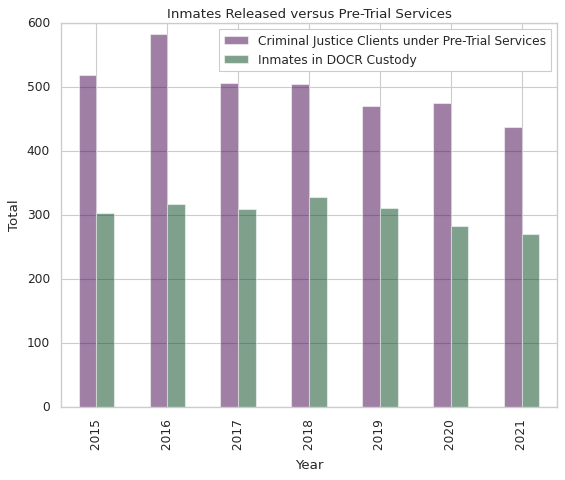

In [254]:
# Table of total daily population of people in pretrial services versus detention by year
ax = df_1_pretrial.groupby(['year', 'category'])['ADP'].mean().unstack().plot.bar(colormap='PRGn', alpha = 0.5)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1, 1])

plt.title('Inmates Released versus Pre-Trial Services')
plt.xlabel('Year')
plt.ylabel('Total')

In [255]:
# Table of average total daily population of people in pretrial services versus detention by year
df_categoryyear = pd.DataFrame(df_1_pretrial.groupby(['year', 'category'])['ADP'].mean())
df_catyearplot = pd.DataFrame(round(df_categoryyear.ADP, 1))

In [256]:
df_catyearplot

ADP
year  category                                                
 2015 Criminal Justice Clients under Pre-Trial Services  518.9
      Inmates in DOCR Custody                            303.9
 2016 Criminal Justice Clients under Pre-Trial Services  583.3
      Inmates in DOCR Custody                            318.0
 2017 Criminal Justice Clients under Pre-Trial Services  506.9
      Inmates in DOCR Custody                            309.7
 2018 Criminal Justice Clients under Pre-Trial Services  505.4
      Inmates in DOCR Custody                            329.4
 2019 Criminal Justice Clients under Pre-Trial Services  470.3
      Inmates in DOCR Custody                            312.0
 2020 Criminal Justice Clients under Pre-Trial Services  475.0
      Inmates in DOCR Custody                            284.0
 2021 Criminal Justice Clients under Pre-Trial Services  437.6
      Inmates in DOCR Custody                            270.8

In [259]:
df_categoryyear.head()

ADP
year  category                                                     
 2015 Criminal Justice Clients under Pre-Trial Services  518.944444
      Inmates in DOCR Custody                            303.875000
 2016 Criminal Justice Clients under Pre-Trial Services  583.305556
      Inmates in DOCR Custody                            318.000000
 2017 Criminal Justice Clients under Pre-Trial Services  506.944444

In [273]:
# Sum of each group to determine percentage
df_1_pretrial['ptsum'] = (df_1_pretrial.loc[df_1_pretrial['category'] == "Inmates in DOCR Custody"] / df_1_pretrial.loc[df_1_pretrial['category'] == "Criminal Justice Clients under Pre-Trial Services"].total) * 100
df_1_pretrial['ptsum'] = .sum()
dtsum = df_1_pretrial.loc[df_1_pretrial['category'] == "Inmates in DOCR Custody"].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# for cumulative percentages: df_catyear['percent_PT'] = (df_release.RPR.sum() / df_release.total.cumsum()) * 100
df_release_1['percent_RPR'] = (df_release.RPR / df_release.total) * 100
df_release_1['percent_bond'] = (df_release_1.released_bond / df_release_1.total ) * 100

Text(0, 0.5, 'Total')

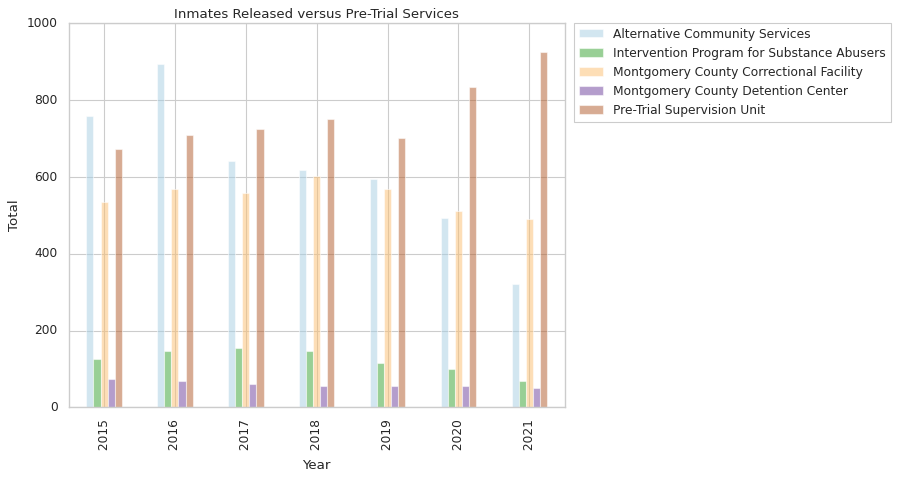

In [183]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
ax = df_1_pretrial.groupby(['year', 'DSCC_Names'])['ADP'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.5)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.67, 1.018])

plt.title('Comparing Various Pre-Trial Categories of Supervision and Detention')
plt.xlabel('Year')
plt.ylabel('Total')


It makes sense that the MCDC figures are low.  the MCDC is where the CPU processing (initial arrest booking) takes place.  The MCDC is a temporary dentention center with a capacity only up to 200 people.

What is interesting on this chart is how much Pre-trial Supervision has increased in the past six years, while alternative community services and intervention programs for substance abusers have both decreased since 2017, with alternative community services decreasing quite sharply, especially between 2016 and 2017.  The number of people detained seems to have decreased slightly since 2018.

In [ ]:
# for cumulative percentages: df_release_1['percent_RPR'] = (df_release.RPR.sum() / df_release.total.cumsum()) * 100
df_release_1['percent_RPR'] = (df_release.RPR / df_release.total) * 100
df_release_1['percent_bond'] = (df_release_1.released_bond / df_release_1.total ) * 100
df_release_1['percent_committed'] = (df_release_1.Committed / df_release_1.total ) * 100
df_release_1['percent_released'] = ((df_release_1.released_bond + df_release_1.RPR) / df_release_1.total ) * 100
df_release_1
df_release_1.head(1)